# AirBnB data EDA: feature distributions

## Notebook set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data loading/inspection

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       Brooklyn   
neighbourhood                                           Kensington   
latitude                                                  40.64749   
longitude                                                -73.97237   
room_type                                             Private room   
price                                                          149   
minimum_nights                                                   1   
number_of_reviews                                                9   
last_review                                             2018-10-19   
reviews_per_month                                             0.21   
calculated_host_listings_count                                   6   
availability_365                                               365   

                                                    1  \
id                                               2595   
name                            Skylit Midtown Castle   
host_id                                          2845   
host_name                                    Jennifer   
neighbourhood_group                         Manhattan   
neighbourhood                                 Midtown   
latitude                                     40.75362   
longitude                                   -73.98377   
room_type                             Entire home/apt   
price                                             225   
minimum_nights                                      1   
number_of_reviews                                  45   
last_review                                2019-05-21   
reviews_per_month                                0.38   
calculated_host_listings_count                      2   
availability_365                                  355   

                                                                  2  \
id                                                             3647   
name                            THE VILLAGE OF HARLEM....NEW YORK !   
host_id                                                        4632   
host_name                                                 Elisabeth   
neighbourhood_group                                       Manhattan   
neighbourhood                                                Harlem   
latitude                                                   40.80902   
longitude                                                  -73.9419   
room_type                                              Private room   
price                                                           150   
minimum_nights                                                    3   
number_of_reviews                                                 0   
last_review                                                     NaN   
reviews_per_month                                               NaN   
calculated_host_listings_count                                    1   
availability_365                                                365   

                                                              3  \
id                                                         3831   
name                            Cozy Entire Floor of Brownstone   
host_id                                                    4869   
host_name                                           LisaRoxanne   
neighbourhood_group                                    Brooklyn   
neighbourhood                                      Clinton Hill   
latitude                                               40.68514   
longitude                                             -73.95976   
room_type                                       Entire home/apt   
price                     

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Categorical features

### 2.1. Levels

In [4]:
categorical_features=['neighbourhood_group','neighbourhood','room_type','host_name']

print('Unique levels by feature')
data_df[categorical_features].nunique()

Unique levels by feature


neighbourhood_group        5
neighbourhood            221
room_type                  3
host_name              11452
dtype: int64

### 2.2. Level counts

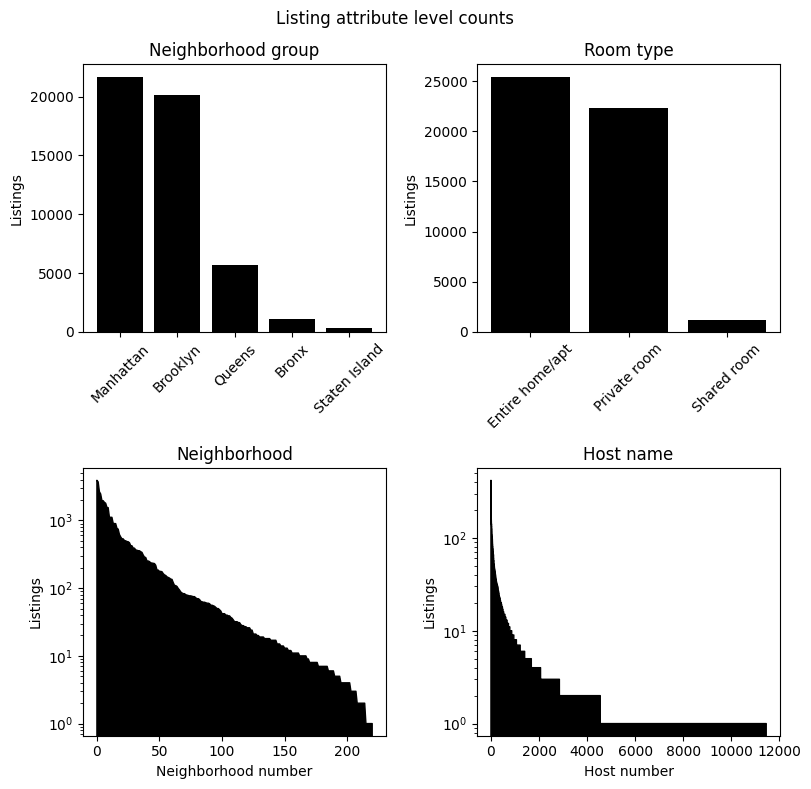

In [5]:
fig, axs=plt.subplots(2,2, figsize=(8,8))
axs=axs.flatten()

fig.suptitle('Listing attribute level counts')

# Plot neighborhood group level counts
level_counts=data_df['neighbourhood_group'].value_counts()

axs[0].set_title('Neighborhood group')
axs[0].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_ylabel('Listings')

# Plot room type level counts
level_counts=data_df['room_type'].value_counts()

axs[1].set_title('Room type')
axs[1].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylabel('Listings')

# Plot neighborhood level counts
level_counts=data_df['neighbourhood'].value_counts()

axs[2].set_title('Neighborhood')
axs[2].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[2].set_xlabel('Neighborhood number')
axs[2].set_ylabel('Listings')
axs[2].set_yscale('log')

# Plot neighborhood level counts
level_counts=data_df['host_name'].value_counts()

axs[3].set_title('Host name')
axs[3].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[3].set_xlabel('Host number')
axs[3].set_ylabel('Listings')
axs[3].set_yscale('log')

plt.tight_layout()

In [6]:
data_df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

## 3. Numerical features

### 3.1. Descriptive statistics

In [7]:
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data_df[numeric_features].describe().transpose()

count        mean         std       min  \
latitude                        48895.0   40.728949    0.054530  40.49979   
longitude                       48895.0  -73.952170    0.046157 -74.24442   
price                           48895.0  152.720687  240.154170   0.00000   
minimum_nights                  48895.0    7.029962   20.510550   1.00000   
number_of_reviews               48895.0   23.274466   44.550582   0.00000   
reviews_per_month               38843.0    1.373221    1.680442   0.01000   
calculated_host_listings_count  48895.0    7.143982   32.952519   1.00000   
availability_365                48895.0  112.781327  131.622289   0.00000   

                                     25%        50%         75%          max  
latitude                        40.69010   40.72307   40.763115     40.91306  
longitude                      -73.98307  -73.95568  -73.936275    -73.71299  
price                           69.00000  106.00000  175.000000  10000.00000  
minimum_nights                   1.00000    3.00000    5.000000   1250.00000  
number_of_reviews                1.00000    5.00000   24.000000    629.00000  
reviews_per_month                0.19000    0.72000    2.020000     58.50000  
calculated_host_listings_count   1.00000    1.00000    2.000000    327.00000  
availability_365                 0.00000   45.00000  227.000000    365.00000

### 3.2. Distribution plots

#### 3.2.1. Latitude & longitude

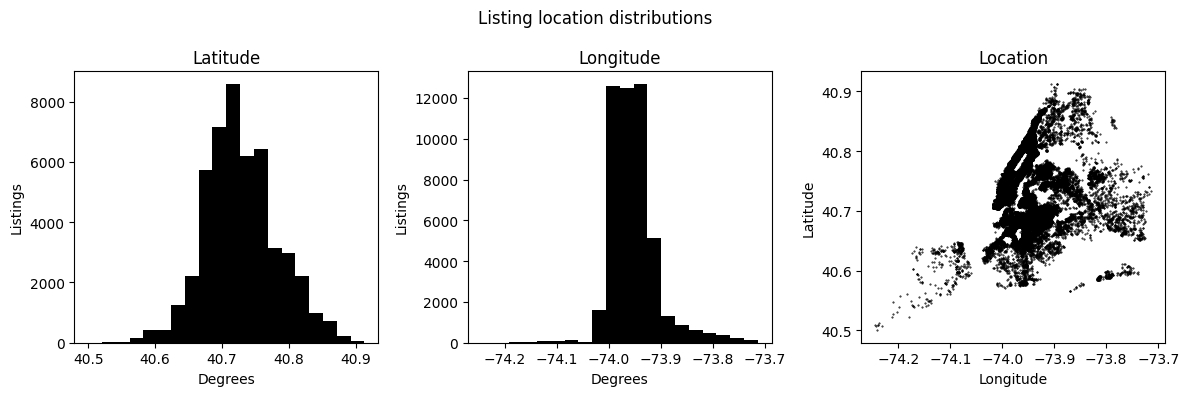

In [8]:
fig, axs=plt.subplots(1,3, figsize=(12,4))
axs=axs.flatten()

fig.suptitle('Listing location distributions')

axs[0].set_title('Latitude')
axs[0].hist(data_df['latitude'], color='black', bins=20)
axs[0].set_xlabel('Degrees')
axs[0].set_ylabel('Listings')

axs[1].set_title('Longitude')
axs[1].hist(data_df['longitude'], color='black', bins=20)
axs[1].set_xlabel('Degrees')
axs[1].set_ylabel('Listings')

axs[2].set_title('Location')
axs[2].scatter(data_df['longitude'], data_df['latitude'], s=0.2, color='black')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

#### 3.2.2. Other listing attributes

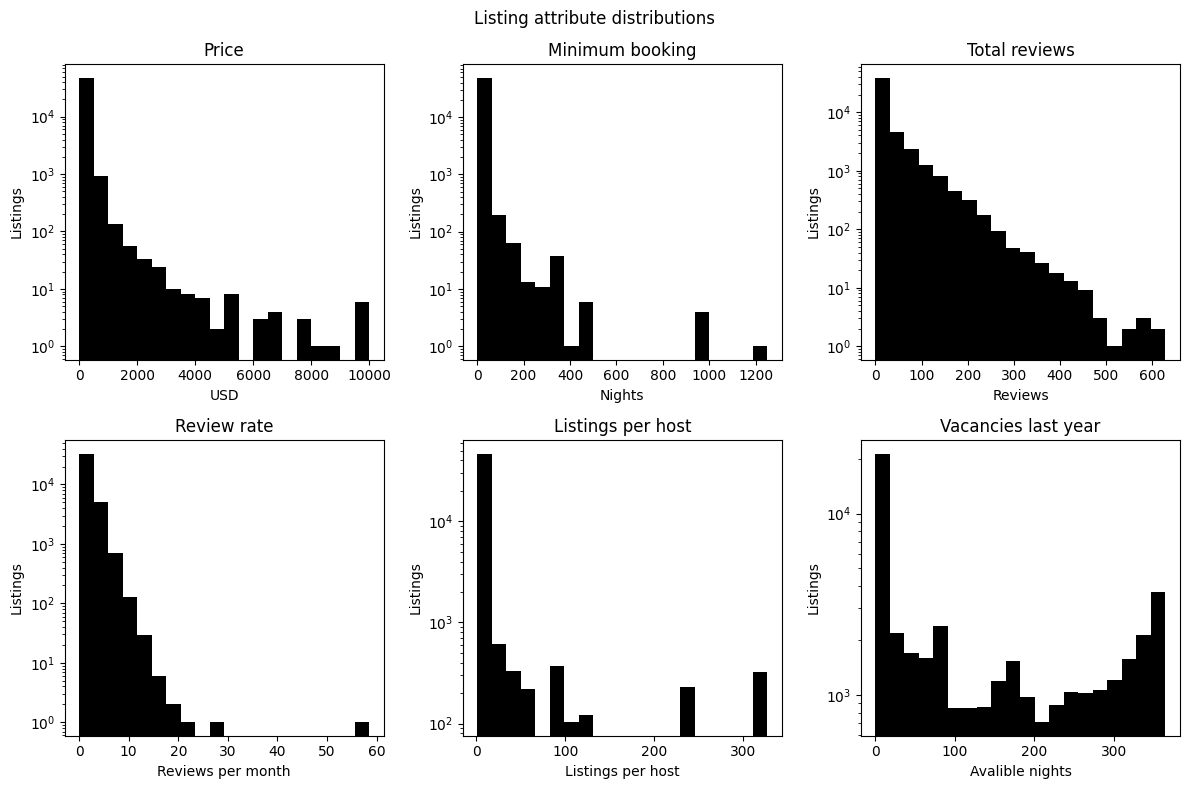

In [9]:
features=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
plot_titles=['Price', 'Minimum booking', 'Total reviews', 'Review rate', 'Listings per host', 'Vacancies last year']
xlabels=['USD', 'Nights', 'Reviews', 'Reviews per month', 'Listings per host', 'Avalible nights']

fig, axs=plt.subplots(2,3, figsize=(12,8))
axs=axs.flatten()

fig.suptitle('Listing attribute distributions')

for i, (plot_title, feature, xlabel) in enumerate(zip(plot_titles, features, xlabels)):

    axs[i].set_title(plot_title)
    axs[i].hist(data_df[feature], bins=20, color='black')
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel('Listings')
    axs[i].set_yscale('log')

plt.tight_layout()


In [14]:
data_df[data_df['price'] > 5000]

id                                               name    host_id  \
3537    2110145                 UWS 1BR w/backyard + block from CP    2151325   
3720    2243699                SuperBowl Penthouse Loft 3,000 sqft    1483320   
3774    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
4377    2953058                                      Film Location    1177497   
6530    4737930                                 Spanish Harlem Apt    1235070   
9151    7003697                Furnished room in Astoria apartment   20582832   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
15560  12520066                 Luxury townhouse Greenwich Village   66240032   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238  22436899                                1-BR Lincoln Center   72390391   
29662  22779726          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
29664  22780103          Park Avenue Mansion by (Hidden by Airbnb)  156158778   
30268  23377410  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
37194  29547314               Apartment New York \nHell’s Kitchens   35303743   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
42523  33007610                70' Luxury MotorYacht on the Hudson    7407743   
43009  33397385    Midtown Manhattan great location (Gramacy park)   16105313   
44034  33998396                   3000 sq ft daylight photo studio    3750764   
45666  34895693                               Gem of east Flatbush  262534951   
48043  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   

         host_name neighbourhood_group      neighbourhood  latitude  \
3537   Jay And Liz           Manhattan    Upper West Side  40.77782   
3720          Omri           Manhattan       Little Italy  40.71895   
3774      Jonathan            Brooklyn       Clinton Hill  40.68766   
4377       Jessica            Brooklyn       Clinton Hill  40.69137   
6530         Olson           Manhattan        East Harlem  40.79264   
9151      Kathrine              Queens            Astoria  40.76810   
12342          Amy           Manhattan    Lower East Side  40.71355   
15560        Linda           Manhattan  Greenwich Village  40.73046   
17692         Erin            Brooklyn         Greenpoint  40.73260   
29238       Jelena           Manhattan    Upper West Side  40.77213   
29662        Sally           Manhattan    Upper East Side  40.76824   
29664        Sally           Manhattan    Upper East Side  40.78517   
30268          Rum           Manhattan            Tribeca  40.72197   
37194     Patricia           Manhattan    Upper West Side  40.76835   
40433         Matt           Manhattan    Lower East Side  40.71980   
42523         Jack           Manhattan  Battery Park City  40.71162   
43009        Debra           Manhattan            Midtown  40.74482   
44034        Kevin           Manhattan            Chelsea  40.75060   
45666       Sandra            Brooklyn      East Flatbush  40.65724   
48043        Jenny           Manhattan            Tribeca  40.71206   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
3537   -73.97848  Entire home/apt   6000              14                 17   
3720   -73.99793  Entire home/apt   5250               1                  0   
3774   -73.96439  Entire home/apt   6500               1                  0   
4377   -73.96723  Entire home/apt   8000               1                  1   
6530   -73.93898  Entire home/apt   9999               5                  1   
9151   -73.91651     Private room  10000             100                  2   
12342  -73.98507     Private room   9999              99                  6   
15560  -73.99562  Entire home/apt   6000               1                  0   
17692  -73.95739  Entire home/apt  10000               5                  5   
29238  -73.98665  Entire home

In [15]:
data_df[data_df['minimum_nights'] > 900]

id                                name    host_id  host_name  \
2854    1615764                                 NaN    6676776      Peter   
5767    4204302    Prime W. Village location 1 bdrm   17550546  Genevieve   
13404  10053943  Historic Designer 2 Bed. Apartment    2697686   Glenn H.   
26341  20990053     Beautiful place in Brooklyn! #2  151084261      Angie   
38664  30378211        Shared Studio (females only)  200401254        Meg   

      neighbourhood_group      neighbourhood  latitude  longitude  \
2854            Manhattan  Battery Park City  40.71239  -74.01620   
5767            Manhattan  Greenwich Village  40.73293  -73.99782   
13404           Manhattan             Harlem  40.82915  -73.94034   
26341            Brooklyn       Williamsburg  40.71772  -73.95059   
38664           Manhattan  Greenwich Village  40.73094  -73.99900   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2854   Entire home/apt    400            1000                  0         NaN   
5767   Entire home/apt    180            1250                  2  2014-11-09   
13404  Entire home/apt     99             999                  2  2018-01-04   
26341     Private room     79             999                 24  2018-06-28   
38664      Shared room    110             999                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
2854                 NaN                               1               362  
5767                0.03                               1               365  
13404               0.07                               1                42  
26341               1.12                               6               249  
38664                NaN                               1               365